# Movie recommender systems using Regularized movie and user effect model


____________________________________________________________________

A recommender system is a type of information filtering system that predicts the preference or rating a user might give to an item (such as movies, music, products, or content). The primary goal of these systems is to deliver relevant items to users, enhancing user satisfaction by guiding them through the vast array of available options.

### Classification of Recommender System Approaches



**Collaborative Filtering**: This approach leverages user interactions and historical data (such as ratings or watch history) to make recommendations. It is based on the assumption that users who agreed in the past will agree in the future. Collaborative filtering is divided into:

- User-Based Collaborative Filtering: Recommends items that similar users have liked.

- Item-Based Collaborative Filtering: Recommends items similar to the ones the user has liked in the past.

**Content-Based Filtering**: This approach focuses on the features of items and matches them to the user’s profile, which includes preferences or past interactions. The system recommends items similar to those the user has previously shown interest in, based on item attributes.

**Hybrid Methods**: These systems combine collaborative and content-based methods to improve accuracy and cover limitations of individual methods, aiming to benefit from the strengths of both.



##  EDA and Data visualization

Let's import the necessary libraries:

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

We will import first the movielens data, whish is available at the website : http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [30]:
Data_stats=pd.read_csv('ml-100k/u.info',header=None)

A first glance on the data size 

In [31]:
Data_stats[0]

0         943 users
1        1682 items
2    100000 ratings
Name: 0, dtype: object

Now let's import the full data set with 100000 ratings by 943 users on 1682 items.

In [32]:
Columns=['User id','movie id','Rating','Timestamp']
u_Data=pd.read_csv('ml-100k/u.data', header=None, sep='\t', names=Columns )

In [33]:
u_Data.head()

,User id,movie id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Let's check Nan values if they exist 

In [34]:
u_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   User id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   Rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


As seen above, the data is complete and it has no  missing values. let's check if we have duplicated rows :

In [35]:
print(u_Data.duplicated().sum())


0


In [36]:
u_Data.head()

,User id,movie id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


The time stamps are unix seconds since 1/1/1970 UTC ; this column is written in incomprehnsible format , so let's change it to a more readable one

In [37]:
# Convert timestamp to datetime
u_Data['date'] = pd.to_datetime(u_Data['Timestamp'], unit='s')


In [38]:
u_Data

,User id,movie id,Rating,Timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16
...,...,...,...,...,...
99995,880,476,3,880175444,1997-11-22 05:10:44
99996,716,204,5,879795543,1997-11-17 19:39:03
99997,276,1090,1,874795795,1997-09-20 22:49:55
99998,13,225,2,882399156,1997-12-17 22:52:36


In [39]:
u_Data.drop('Timestamp', axis=1)

,User id,movie id,Rating,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


### Rating Distribution per Item

Here, we'll calculate how each rating (1–5) is distributed for each item (movie). This gives insight into how frequently each rating is assigned to each movie.

In [40]:
# Group by 'item_id' and 'rating', then count the occurrences
rating_distribution_per_item = u_Data.groupby(['Item Id', 'Rating']).size().unstack(fill_value=0)

# Plot the rating distribution per item
rating_distribution_per_item.plot(kind='bar', stacked=True, figsize=(14, 8), title='Rating Distribution per Item')
plt.xlabel('Item (Movie) ID')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

KeyError: 'Item Id'

In [ ]:
rating_distribution_per_item

Rating,1,2,3,4,5
Item Id,,,,,
1,8,27,96,202,119
2,8,17,55,42,9
3,11,20,25,23,11
4,6,24,57,93,29
5,4,11,32,33,6
...,...,...,...,...,...
1678,1,0,0,0,0
1679,0,0,1,0,0
1680,0,1,0,0,0


 ### Rating Distribution per User
 
Similarly, we can calculate the distribution of ratings that each user gives. This shows whether individual users tend to give higher, lower, or balanced ratings.

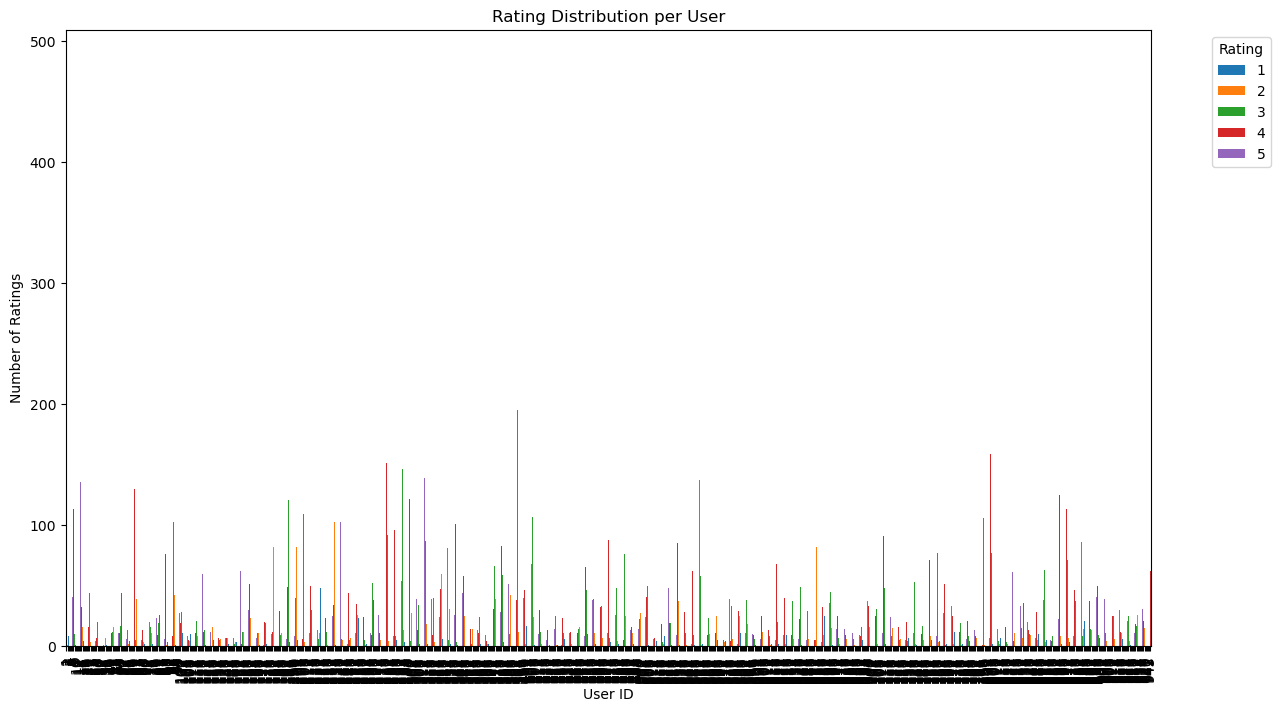

In [ ]:
# Group by 'user_id' and 'rating', then count the occurrences
rating_distribution_per_user = u_Data.groupby(['User id', 'Rating']).size().unstack(fill_value=0)

# Plot the rating distribution per user
rating_distribution_per_user.plot(kind='bar', stacked=False, figsize=(14, 8), title='Rating Distribution per User')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


 ### Rating Distribution (Overall)
To see how often each rating (1–5) occurs across all users and items, you can create a simple bar plot of the rating column.

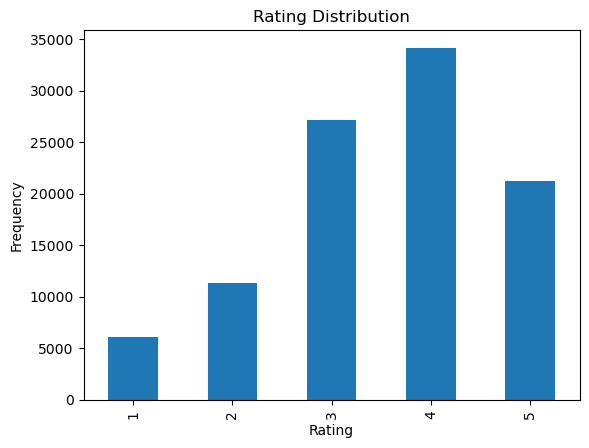

In [ ]:


u_Data['Rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Number of Ratings per User
To understand how many ratings each user has provided, we group by user_id and count the number of ratings for each user. This will help in analyzing user engagement.

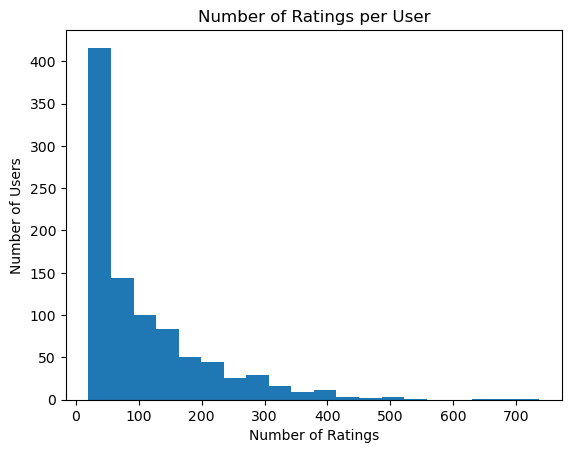

In [ ]:
# Group by 'user_id' and count the number of ratings for each user
ratings_per_user = u_Data.groupby('User id')['Rating'].count()

# Plot the distribution of number of ratings per user
ratings_per_user.plot(kind='hist', bins=20, title='Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


Here we can see that most users rate only a limited number of movies, while a small group of highly active users contributes a large number of ratings.

### Number of Ratings per Item
To see how popular each movie is, we can group by item_id and count the number of ratings each item has received. This will indicate the popularity of each movie based on the number of ratings.

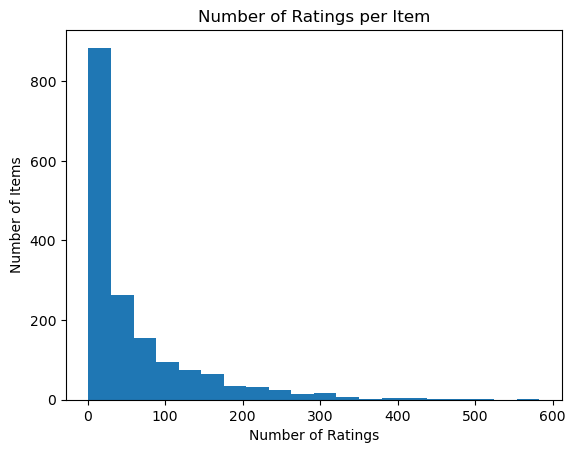

In [ ]:
# Group by 'item_id' and count the number of ratings for each item
ratings_per_item = u_Data.groupby('Item Id')['Rating'].count()

# Plot the distribution of number of ratings per item
ratings_per_item.plot(kind='hist', bins=20, title='Number of Ratings per Item')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items')
plt.show()


The distribution is heavily skewed to the left, indicating that most items (movies) have a relatively low number of ratings.
Also a large number of movies have fewer than 50 ratings, with the count rapidly decreasing as the number of ratings per movie increases.

This possibly indicates a long tail of lesser-known or less popular movies. A few popular movies, however, receive a high volume of ratings, likely because they appeal to a broader audience.

## Movies Data

In [ ]:
Movies_ids=['movie id', 'movie title','release date',' video releasedate','IMDb URL' ,'unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
u_item = pd.read_csv('ml-100k/u.item', header=None, sep='|', names=Movies_ids, encoding='ISO-8859-1')

In [ ]:
u_item

,movie id,movie title,release date,video releasedate,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_names=u_item[['movie id','movie title']]

In [ ]:
movies_names

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
merged_dataset = pd.merge(u_Data, movies_names, how='inner', on='movie id')

KeyError: 'movie id'